# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities_aaron.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# api url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
date = "MM/DD/YYYY"

# query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

date = []
country = []
lat = []
lon = []
temp = []
cloudiness = []
humidity = []
wind_speed = []
desc = []
city_name = []

# build For-Loop
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        #desc.append(response['weather']['description'])
        date.append(response['dt'])
        city_name.append(response['name'])
        print(city)
    except KeyError:
        print("City not found...skipping:")



poum
cherskiy
new norfolk
tuktoyaktuk
tayshet
darapidap
mataura
namatanai
caravelas
City not found...skipping:
lasa
hilo
punta arenas
marsala
hobart
butaritari
saint-philippe
City not found...skipping:
kampong chhnang
busselton
bluff
saldanha
qaanaaq
tessalit
barra patuca
nicoya
vila franca do campo
ushuaia
tucumcari
ishigaki
gamba
port-gentil
kutum
dikson
namibe
severo-kurilsk
jaguaribe
college
lovington
pangnirtung
barcelos
City not found...skipping:
airai
bethel
saint-joseph
champerico
cape town
City not found...skipping:
lebu
gornopravdinsk
kolokani
souillac
vaini
carnarvon
jamestown
channel-port aux basques
pastavy
evensk
barrow
rikitea
atlantic beach
saint george
kruisfontein
svetlaya
City not found...skipping:
kenai
los andes
port blair
tasiilaq
bilma
nechi
basoko
albany
geraldton
humboldt
catuday
luderitz
kozhva
nikolskoye
ust-kuyga
makakilo city
merrill
kapaa
constitucion
castro
tiksi
bathsheba
City not found...skipping:
acapulco
mar del plata
provideniya
shenjiamen
fairbanks


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Export into .csv
weather_dict = {
    "City": city_name,
    "Country": country,
    "Lat": lat,
    "Lon": lon,
    "Temp": temp,
    #"description": desc,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Wind Speed": wind_speed,
    "Date": date
}
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df.to_csv(output_data_file)

In [5]:
# Display DataFrame
weather_data_df.head()

,City,Country,Lat,Lon,Temp,Cloudiness,Humidity,Wind Speed,Date
0,Poum,NC,-20.23,164.02,77.25,0,78,11.21,1587498701
1,Cherskiy,RU,68.75,161.30,13.71,96,95,8.23,1587498701
2,New Norfolk,AU,-42.78,147.06,49.55,72,72,4.00,1587498701
3,Tuktoyaktuk,CA,69.45,-133.04,5.00,75,77,21.92,1587498701
4,Tayshet,RU,55.93,98.00,31.91,94,74,5.35,1587498701


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

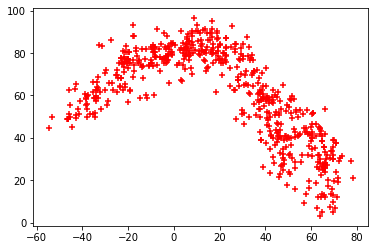

In [6]:
# * Temperature (F) vs. Latitude

temp_scat = plt.scatter(lat, temp, marker="+", facecolors="red")
plt.xlabel = "Latitude"
plt.ylabel = "Temperature (F)"
plt.show(temp_scat)

#### Latitude vs. Humidity Plot

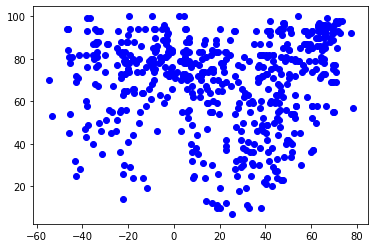

In [7]:
# * Humidity (%) vs. Latitude
humid_scat = plt.scatter(lat, humidity, marker="o", facecolors="blue")
plt.xlabel = "Latitude"
plt.ylabel = "Humidity (%)"
plt.show(humid_scat)

#### Latitude vs. Cloudiness Plot

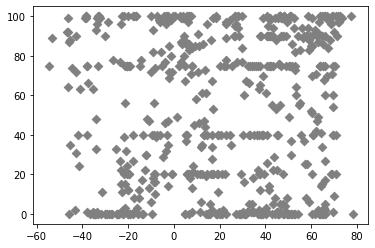

In [8]:
# * Cloudiness (%) vs. Latitude
cloud_scat = plt.scatter(lat, cloudiness, marker="D", facecolors="grey")
plt.xlabel = "Latitude"
plt.ylabel = "Cloudiness (%)"
plt.show(cloud_scat)

#### Latitude vs. Wind Speed Plot

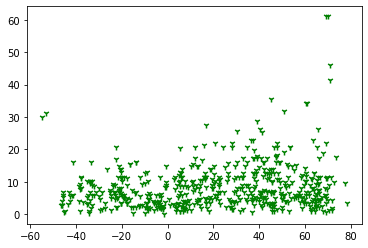

In [9]:
# * Wind Speed (mph) vs. Latitude
wind_scat = plt.scatter(lat, wind_speed, marker="1", facecolors="green", edgecolors="black")
plt.xlabel = "Latitude"
plt.ylabel = "Wind Speed (mph)"
plt.show(wind_scat)

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [33]:
# Create Northern and Southern Hemisphere DataFrames

date_north = []
country_north = []
lat_north = []
lon_north = []
temp_north = []
cloudiness_north = []
humidity_north = []
wind_speed_north = []
desc_north = []
city_name_north = []

date_south = []
country_south = []
lat_south = []
lon_south = []
temp_south = []
cloudiness_south = []
humidity_south = []
wind_speed_south = []
desc_south = []
city_name_south = []

#for cities in weather_data_df:

#hosted_in_us_df = reduced_kickstarter_df.loc[reduced_kickstarter_df["country"] == "US",  columns]
north_df = weather_data_df.loc[weather_data_df["Lat"] > 0]

south_df = weather_data_df.loc[weather_data_df["Lat"] < 0]

north_df.head()

,City,Country,Lat,Lon,Temp,Cloudiness,Humidity,Wind Speed,Date
1,Cherskiy,RU,68.75,161.30,13.71,96,95,8.23,1587498701
3,Tuktoyaktuk,CA,69.45,-133.04,5.00,75,77,21.92,1587498701
4,Tayshet,RU,55.93,98.00,31.91,94,74,5.35,1587498701
5,Darapidap,PH,17.21,120.41,80.01,99,75,1.99,1587498701
9,Laas,IT,46.62,10.70,46.40,75,81,3.36,1587498701


In [86]:
len(lat)

573

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

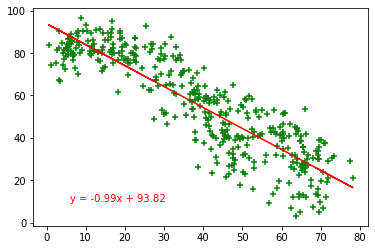

 The r-squared is: -0.8806005783855557


In [84]:
north_lat = north_df["Lat"]
north_temp = north_df["Temp"]
north_temp_scat = plt.scatter(north_lat, north_temp, marker="+", facecolors="green")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = (north_lat) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel = "Latitude"
plt.ylabel = "Temperature (F)"
plt.show(north_temp_scat)

print(f' The r-squared is: {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

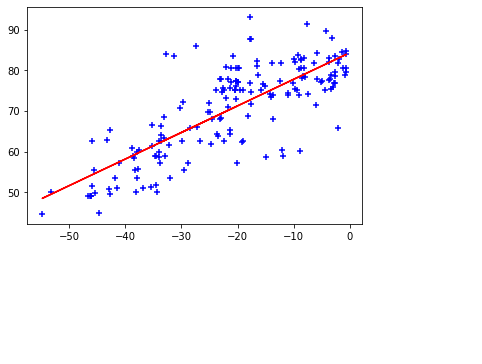

 The r-squared is: 0.7866460981042355


In [74]:
south_lat = south_df["Lat"]
south_temp = south_df["Temp"]
south_temp_scat = plt.scatter(south_lat, south_temp, marker="+", facecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = (south_lat) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel = "Latitude"
plt.ylabel = "Temperature (F)"
plt.show(south_temp_scat)

print(f' The r-squared is: {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

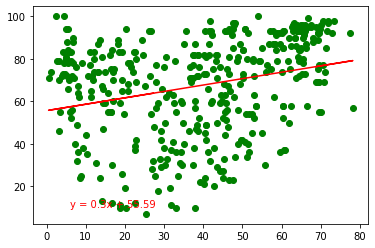

 The r-squared is: 0.2735711694149213


In [83]:
north_humid = north_df["Humidity"]
north_humid_scat = plt.scatter(north_lat, north_humid, marker="o", facecolors="green")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humid)
regress_values = (north_lat) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel = "Latitude"
plt.ylabel = "Humidity"
plt.show(north_humid_scat)

print(f' The r-squared is: {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

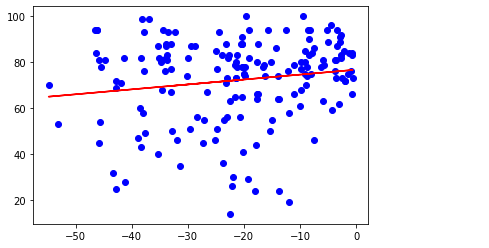

 The r-squared is: 0.15684748231856793


In [76]:
south_lat = south_df["Lat"]
south_humid = south_df["Humidity"]
south_humid_scat = plt.scatter(south_lat, south_humid, marker="o", facecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)
regress_values = (south_lat) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel = "Latitude"
plt.ylabel = "Humidity"
plt.show(south_humid_scat)

print(f' The r-squared is: {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

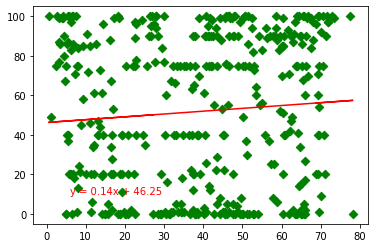

 The r-squared is: 0.07865539010293407


In [82]:
north_cloud = north_df["Cloudiness"]
north_cloud_scat = plt.scatter(north_lat, north_cloud, marker="D", facecolors="green")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
regress_values = (north_lat) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel = "Latitude"
plt.ylabel = "Cloudiness"
plt.show(north_cloud_scat)

print(f' The r-squared is: {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

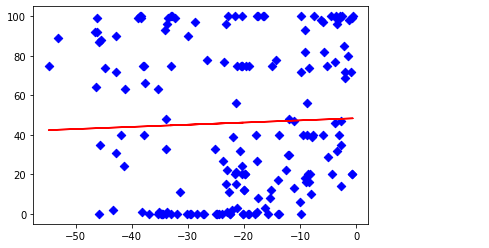

 The r-squared is: 0.03884147558714273


In [77]:
south_cloud = south_df["Cloudiness"]
south_cloud_scat = plt.scatter(south_lat, south_cloud, marker="D", facecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
regress_values = (south_lat) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel = "Latitude"
plt.ylabel = "Cloudiness"
plt.show(south_cloud_scat)

print(f' The r-squared is: {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

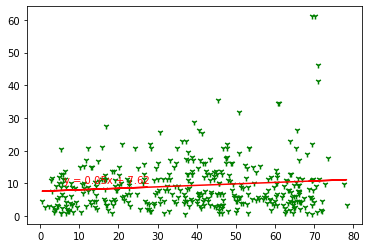

 The r-squared is: 0.12263708269986355


In [81]:
north_wind = north_df["Wind Speed"]
north_wind_scat = plt.scatter(north_lat, north_wind, marker="1", facecolors="green")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = (north_lat) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel = "Latitude"
plt.ylabel = "Windiness"
plt.show(north_wind_scat)

print(f' The r-squared is: {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

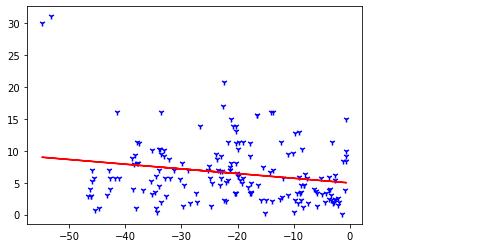

 The r-squared is: -0.20590503287664091


In [79]:
south_wind = south_df["Wind Speed"]
south_wind_scat = plt.scatter(south_lat, south_wind, marker="1", facecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = (south_lat) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel = "Latitude"
plt.ylabel = "Windiness"
plt.show(south_wind_scat)

print(f' The r-squared is: {rvalue}')